In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from scipy.io import arff
from numpy.lib import average

In [ ]:
iot23 = pd.read_csv("iot_23_dataset.csv", nrows = 75534)
p = LabelEncoder()
iot23.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1547144801,CTfsE54Xtw73NMFy1f,192.168.1.198,54580,46.201.136.250,23,tcp,-,-,-,...,S0,-,-,0,S,1,40,0,0,Benign
1,1547144817,C1bjes4XYnqoAAq72,192.168.1.198,52458,62.235.223.45,23,tcp,-,-,-,...,S0,-,-,0,S,1,40,0,0,Benign
2,1547144832,CZlL5l4FnAUNl657x4,192.168.1.198,54580,18.98.174.69,23,tcp,-,-,-,...,S0,-,-,0,S,1,40,0,0,Benign
3,1547144801,Cz9mZs2PSXX4TYUohi,192.168.1.198,10803,84.142.131.154,23,tcp,-,-,-,...,S0,-,-,0,S,1,40,0,0,Benign
4,1547144767,CGORSp333qsZ96DSth,192.168.1.198,22568,185.181.179.138,52869,tcp,-,-,-,...,S0,-,-,0,S,1,40,0,0,POHPS


In [ ]:
#feature scaling because several of the columns are strings 
iot23['id.orig_h'] = p.fit_transform(iot23['id.orig_h'])
iot23['id.resp_h'] = p.fit_transform(iot23['id.resp_h'])
iot23['proto'] = p.fit_transform(iot23['proto'])
iot23['conn_state'] = p.fit_transform(iot23['conn_state'])
iot23['history'] = p.fit_transform(iot23['history'])
#iot23['label'] = p.fit_transform(iot23['label']) 
iot23 = iot23.drop(columns=['uid', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp'])
iot23.head()

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1547144801,0,54580,54899,23,1,3,0,3,1,40,0,0,Benign
1,1547144817,0,52458,56877,23,1,3,0,3,1,40,0,0,Benign
2,1547144832,0,54580,13928,23,1,3,0,3,1,40,0,0,Benign
3,1547144801,0,10803,59715,23,1,3,0,3,1,40,0,0,Benign
4,1547144767,0,22568,19456,52869,1,3,0,3,1,40,0,0,POHPS


In [ ]:
X = iot23[iot23.columns[0:13]]
Y = iot23["label"]
X

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1547144801,0,54580,54899,23,1,3,0,3,1,40,0,0
1,1547144817,0,52458,56877,23,1,3,0,3,1,40,0,0
2,1547144832,0,54580,13928,23,1,3,0,3,1,40,0,0
3,1547144801,0,10803,59715,23,1,3,0,3,1,40,0,0
4,1547144767,0,22568,19456,52869,1,3,0,3,1,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75528,1547144814,0,22568,67180,52869,1,3,0,3,1,40,0,0
75529,1547144810,0,54836,73580,52869,1,3,0,3,1,40,0,0
75530,1547144812,0,53994,51845,52869,1,3,0,3,1,40,0,0
75531,1547144787,0,22568,62993,52869,1,3,0,3,1,40,0,0


In [ ]:
Y

0        Benign
1        Benign
2        Benign
3        Benign
4         POHPS
          ...  
75528     POHPS
75529     POHPS
75530     POHPS
75531     POHPS
75532    Benign
Name: label, Length: 75533, dtype: object

In [ ]:
scaler = StandardScaler()
svm = LinearSVC(C = 1, loss = "hinge", max_iter = 1000000, random_state = 42)

In [ ]:
scaled_svm = Pipeline([("scaler", scaler), ("linear_svc", svm),])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [ ]:
scaled_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, loss='hinge', max_iter=1000000,
                           random_state=42))])

In [51]:
predictions = scaled_svm.predict(X_test)
print("Test Accuracy: {}".format(accuracy_score(y_test, predictions)))
print("Test Precision: {}".format(precision_score(y_test,predictions, average = 'weighted')))
print("Test Recall: {}".format(recall_score(y_test,predictions, average = 'weighted')))

cr = classification_report(y_test, predictions);
print(cr);



Test Accuracy: 0.9596646072374228
Test Precision: 0.9749058485203262
Test Recall: 0.9596646072374228
                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00      7647
             C&C       0.96      0.96      0.96        26
C&C-FileDownload       0.01      0.67      0.01         3
           Okiru       1.00      0.67      0.80      2761
           POHPS       0.95      1.00      0.98     12223

        accuracy                           0.96     22660
       macro avg       0.78      0.86      0.75     22660
    weighted avg       0.97      0.96      0.96     22660



In [54]:
predictions = scaled_svm.predict(X_train)
print("Training Accuracy: {}".format(accuracy_score(y_train, predictions)))
print("Trainign Precision: {}".format(precision_score(y_train,predictions, average = 'weighted')))
print("Training Recall: {}".format(recall_score(y_train,predictions, average = 'weighted')))

cr = classification_report(y_train, predictions);
print(cr);


Training Accuracy: 0.9604713180640403
Trainign Precision: 0.9751295561281885
Training Recall: 0.9604713180640403
                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00     18350
             C&C       1.00      1.00      1.00        55
C&C-FileDownload       0.01      1.00      0.03        10
           Okiru       1.00      0.68      0.81      6492
           POHPS       0.95      1.00      0.98     27966

        accuracy                           0.96     52873
       macro avg       0.79      0.94      0.76     52873
    weighted avg       0.98      0.96      0.96     52873



Labels:
0 --> Benign
1 --> C&C
2 --> C&C FileDownload
3 --> Okiru
4 --> PartOfAHorizontalPortScan


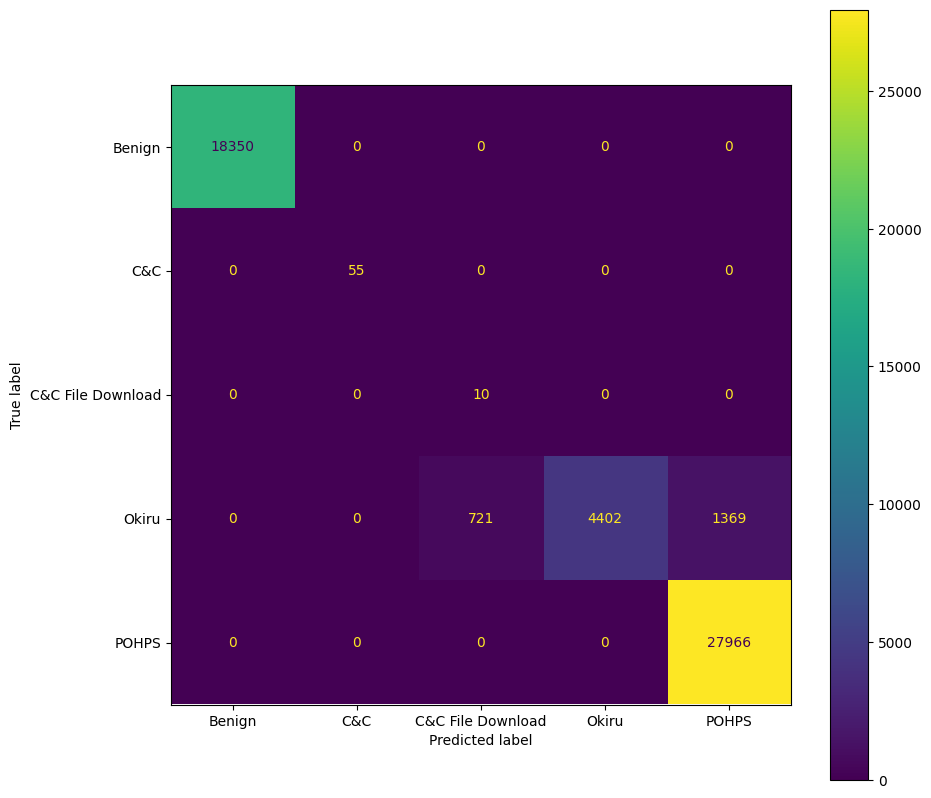

In [46]:
cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Benign", "C&C", "C&C File Download", "Okiru", "POHPS"])

print("Labels:")
print("0 --> Benign")
print("1 --> C&C")
print("2 --> C&C FileDownload")
print("3 --> Okiru")
print("4 --> PartOfAHorizontalPortScan")

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

In [ ]:
#using stratified KFold because data is extremely unbalanced
num_splits = 8
kf = StratifiedKFold(n_splits=num_splits,random_state=42,shuffle=True)
scorings = {"acc" : "accuracy", "prec_macro" : "precision_macro", "rec_macro" : "recall_macro" }

In [ ]:
scores = cross_validate(scaled_svm, X, Y, scoring = scorings, cv = kf, return_train_score = True)

In [ ]:
print("=======================================================")
i = 0
for i in range(0,num_splits):
  print("Accuracy rating for k={}: {}".format(i+1, scores["test_acc"][i]))
  print("Precision rating for k={}: {}".format(i+1, scores["test_prec_macro"][i]))
  print("Recall rating for k={}: {}".format(i+1, scores["test_rec_macro"][i]))
  print("Training Accuracy rating for k = {}: {}".format(i + 1, scores["train_acc"][i]))
  print("Training Precision rating for k = {}: {}".format(i + 1, scores["train_prec_macro"][i]))
  print("Training Recall rating for k = {}: {}".format(i + 1, scores["train_rec_macro"][i]))

  i += 1
  print("=======================================================")

print("Mean Test Accuracy: {}".format(average(scores["test_acc"])))
print("Mean Test Precision: {}".format(average(scores["test_prec_macro"])))
print("Mean Test Recall: {}".format(average(scores["test_rec_macro"])))
print("\n\n")
print("Mean Training Accuracy: {}".format(average(scores["train_acc"])))
print("Mean Training Precision: {}".format(average(scores["train_prec_macro"])))
print("Mean Training Recall: {}".format(average(scores["train_rec_macro"])))

Accuracy rating for k=1: 0.9224740521076044
Precision rating for k=1: 0.8986964663875188
Recall rating for k=1: 0.8535294117647059
Training Accuracy rating for k = 1: 0.9219560908444417
Training Precision rating for k = 1: 0.9652576112483278
Training Recall rating for k = 1: 0.8725947881931579
Accuracy rating for k=2: 0.95721245498835
Precision rating for k=2: 0.8009852216748768
Recall rating for k=2: 0.9301038062283737
Training Accuracy rating for k = 2: 0.9575736484544037
Training Precision rating for k = 2: 0.8007815275310834
Training Recall rating for k = 2: 0.9307397801654934
Accuracy rating for k=3: 0.9199322177504766
Precision rating for k=3: 0.7835402905024803
Recall rating for k=3: 0.8494900605012965
Training Accuracy rating for k = 3: 0.9202917189935089
Training Precision rating for k = 3: 0.7828019287356468
Training Recall rating for k = 3: 0.8698616600790514
Accuracy rating for k=4: 0.8862529125185342
Precision rating for k=4: 0.9647695587994095
Recall rating for k=4: 0.814

In [60]:
uci = pd.read_csv("uci_dataset.csv")
uci.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Label
0,37.146121,60.000000,1.990000e-10,54.692129,60.000000,0.000005,189.613785,60.001284,0.061232,2233.920466,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,scan
1,130.791284,60.000000,2.580000e-07,151.314152,60.000008,0.000120,289.543441,60.002237,0.033551,2333.987698,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,scan
2,154.464956,207.097942,5.102858e+04,231.278499,266.382286,59359.193710,624.329868,344.556639,59597.755860,6294.885399,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,udp
3,163.986586,64.774643,4.436802e+01,249.522257,66.447172,49.526419,687.863409,68.467029,48.041379,6703.659189,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,syn
4,1.109951,97.839511,1.574309e+02,1.350842,91.091868,339.153619,2.136886,79.962929,438.691839,4.124539,...,1.530000e-30,0.0,4.219066,102.0,0.000001,144.249783,5.750000e-12,-2.090000e-28,-6.640000e-17,benign


In [61]:
X2 = uci[uci.columns[0:115]]
Y2 = uci['Label']

In [62]:
X2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,37.146121,60.000000,1.990000e-10,54.692129,60.000000,0.000005,189.613785,60.001284,0.061232,2233.920466,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,130.791284,60.000000,2.580000e-07,151.314152,60.000008,0.000120,289.543441,60.002237,0.033551,2333.987698,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,154.464956,207.097942,5.102858e+04,231.278499,266.382286,59359.193710,624.329868,344.556639,59597.755860,6294.885399,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,163.986586,64.774643,4.436802e+01,249.522257,66.447172,49.526419,687.863409,68.467029,48.041379,6703.659189,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.109951,97.839511,1.574309e+02,1.350842,91.091868,339.153619,2.136886,79.962929,438.691839,4.124539,...,1.820000e-12,1.530000e-30,0.0,4.219066,102.0,0.000001,144.249783,5.750000e-12,-2.090000e-28,-6.640000e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89993,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000003,1.642683,...,3.640000e-12,-1.430000e-34,0.0,4.075307,98.0,0.000001,138.592929,4.070000e-12,-7.420000e-29,-2.880000e-17
89994,98.174185,60.000214,1.026656e-02,117.251149,60.003951,0.189625,255.632912,60.040395,1.923539,2302.872275,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
89995,99.878817,501.223619,2.849214e+04,181.904666,458.610490,42736.515220,603.702079,411.468013,54282.357790,6262.601505,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
89996,68.340841,501.019036,2.336561e+04,128.005073,446.081754,41665.165230,456.595278,372.659933,56693.772900,4976.055560,...,2.910000e-10,0.000000e+00,0.0,16517.205550,554.0,0.000053,554.000000,2.790000e-09,0.000000e+00,0.000000e+00


In [63]:
Y2

0            scan
1            scan
2             udp
3             syn
4          benign
           ...   
89993      benign
89994        scan
89995         ack
89996    udpplain
89997        scan
Name: Label, Length: 89998, dtype: object

In [64]:
scaler2 = StandardScaler()
svm2 = LinearSVC(C = 1, loss = "hinge", max_iter = 10000000, random_state = 42)
scaled_svm2 = Pipeline([("scaler", scaler2), ("linear_svc", svm2),])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,Y2, test_size = 0.4, random_state = 42)

In [65]:
scaled_svm2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, loss='hinge', max_iter=10000000,
                           random_state=42))])

In [69]:
predictions2 = scaled_svm2.predict(X_test2)
print("Test Accuracy: {}".format(accuracy_score(y_test2, predictions2)))
print("Test Precision: {}".format(precision_score(y_test2,predictions2, average = 'weighted')))
print("Test Recall: {}".format(recall_score(y_test2,predictions2, average = 'weighted')))

cr = classification_report(y_test2, predictions2, digits = 6);
print(cr);




Test Accuracy: 0.9997777777777778
Test Precision: 0.9997778703742406
Test Recall: 0.9997777777777778
              precision    recall  f1-score   support

         ack   1.000000  0.999834  0.999917      6013
      benign   1.000000  0.999171  0.999586      6035
        scan   0.999665  1.000000  0.999832      5963
         syn   0.999667  1.000000  0.999834      6008
         udp   0.999334  0.999833  0.999584      6005
    udpplain   1.000000  0.999833  0.999916      5976

    accuracy                       0.999778     36000
   macro avg   0.999778  0.999779  0.999778     36000
weighted avg   0.999778  0.999778  0.999778     36000



In [72]:
predictions2 = scaled_svm2.predict(X_train2)
print("Training Accuracy: {}".format(accuracy_score(y_train2, predictions2)))
print("Training Precision: {}".format(precision_score(y_train2,predictions2, average = 'weighted')))
print("Training Recall: {}".format(recall_score(y_train2,predictions2, average = 'weighted')))

cr = classification_report(y_train2, predictions2, digits = 6);
print(cr);


Training Accuracy: 0.9997962887514352
Training Precision: 0.9997963482988672
Training Recall: 0.9997962887514352
              precision    recall  f1-score   support

         ack   1.000000  0.999889  0.999944      8987
      benign   0.999777  0.999219  0.999498      8965
        scan   0.999779  1.000000  0.999889      9035
         syn   1.000000  0.999889  0.999944      8992
         udp   0.999222  0.999778  0.999500      8995
    udpplain   1.000000  1.000000  1.000000      9024

    accuracy                       0.999796     53998
   macro avg   0.999796  0.999796  0.999796     53998
weighted avg   0.999796  0.999796  0.999796     53998



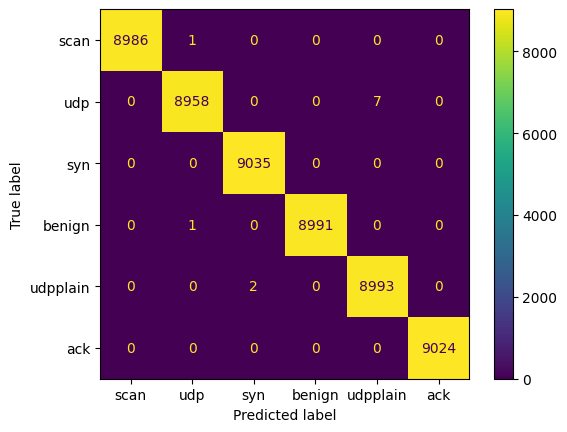

In [ ]:
cm = confusion_matrix(y_train2, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = Y2.unique()).plot()

In [ ]:
num_splits2 = 10
kf2 = StratifiedKFold(n_splits=num_splits2,random_state=42,shuffle=True)
scorings2 = {"acc" : "accuracy", "prec_macro" : "precision_macro", "rec_macro" : "recall_macro" }
scores2 = cross_validate(scaled_svm2, X2, Y2, scoring = scorings2, cv = kf2, return_train_score = True)

In [ ]:
print("=======================================================")
i = 0
for i in range(0,num_splits2):
  print("Accuracy rating for k={}: {}".format(i+1, scores2["test_acc"][i]))
  print("Precision rating for k={}: {}".format(i+1, scores2["test_prec_macro"][i]))
  print("Recall rating for k={}: {}".format(i+1, scores2["test_rec_macro"][i]))
  print("Training Accuracy rating for k = {}: {}".format(i + 1, scores2["train_acc"][i]))
  print("Training Precision rating for k = {}: {}".format(i + 1, scores2["train_prec_macro"][i]))
  print("Training Recall rating for k = {}: {}".format(i + 1, scores2["train_rec_macro"][i]))

  i += 1
  print("=======================================================")

print("Mean Test Accuracy: {}".format(average(scores2["test_acc"])))
print("Mean Test Precision: {}".format(average(scores2["test_prec_macro"])))
print("Mean Test Recall: {}".format(average(scores2["test_rec_macro"])))
print("\n\n")
print("Mean Training Accuracy: {}".format(average(scores2["train_acc"])))
print("Mean Training Precision: {}".format(average(scores2["train_prec_macro"])))
print("Mean Training Recall: {}".format(average(scores2["train_rec_macro"])))

Accuracy rating for k=1: 1.0
Precision rating for k=1: 1.0
Recall rating for k=1: 1.0
Training Accuracy rating for k = 1: 0.999728388355268
Training Precision rating for k = 1: 0.9997285421580231
Training Recall rating for k = 1: 0.9997283950617284
Accuracy rating for k=2: 0.9996666666666667
Precision rating for k=2: 0.9996670365931516
Recall rating for k=2: 0.9996666666666667
Training Accuracy rating for k = 2: 0.9997777722906739
Training Precision rating for k = 2: 0.9997779002036379
Training Recall rating for k = 2: 0.9997777777777778
Accuracy rating for k=3: 0.9997777777777778
Precision rating for k=3: 0.9997779258272264
Recall rating for k=3: 0.9997777777777778
Training Accuracy rating for k = 3: 0.9998024642583767
Training Precision rating for k = 3: 0.9998025468109076
Training Recall rating for k = 3: 0.9998024691358025
Accuracy rating for k=4: 0.9997777777777778
Precision rating for k=4: 0.9997779258272264
Recall rating for k=4: 0.9997777777777778
Training Accuracy rating for k

In [ ]:
nsl_kdd =  pd.DataFrame(arff.loadarff("KDDTrain+.arff")[0])
for cols in ["protocol_type", "service", "flag", "class"]: 
            nsl_kdd[cols] = nsl_kdd[cols].str.decode("utf-8")

nsl_kdd= nsl_kdd.replace({"protocol_type": {"tcp": 0, "udp": 1, "icmp": 2,}})
#nsl_kdd = nsl_kdd.replace({"class": {"normal": 0, "anomaly": 1}})

categories_that_need_mappings = ["service", "flag"]
for category in categories_that_need_mappings: 
  mappings = {}
  for i, value in enumerate(list(set(nsl_kdd[category]))):
    mappings.update({value: i}) 

  nsl_kdd = nsl_kdd.replace({category: mappings})

nsl_kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,0,65,0,491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,1,38,0,146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,0,43,2,0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,0,34,0,232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,0,34,0,199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
X3 = nsl_kdd[nsl_kdd.columns[0:41]]
Y3 = nsl_kdd['class']
X3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,65,0,491.0,0.0,b'0',0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1,38,0,146.0,0.0,b'0',0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0,43,2,0.0,0.0,b'0',0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0,34,0,232.0,8153.0,b'0',0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0,34,0,199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0,43,2,0.0,0.0,b'0',0.0,0.0,0.0,...,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8.0,1,43,0,105.0,145.0,b'0',0.0,0.0,0.0,...,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0.0,0,14,0,2231.0,384.0,b'0',0.0,0.0,0.0,...,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0.0,0,9,2,0.0,0.0,b'0',0.0,0.0,0.0,...,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
scaler3 = StandardScaler()
svm3 = LinearSVC(C = 1, loss = "hinge", max_iter = 10000000, random_state = 42)
scaled_svm3 = Pipeline([("scaler", scaler3), ("linear_svc", svm3),])
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,Y3, test_size = 0.4, random_state = 42)

In [ ]:
scaled_svm3.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, loss='hinge', max_iter=10000000,
                           random_state=42))])

In [52]:
predictions3 = scaled_svm3.predict(X_test3)

print("Test Accuracy: {}".format(accuracy_score(y_test3, predictions3)))
print("Test Precision: {}".format(precision_score(y_test3,predictions3, average = 'weighted')))
print("Test Recall: {}".format(recall_score(y_test3,predictions3, average = 'weighted')))

cr = classification_report(y_test3, predictions3);
print(cr);


Test Accuracy: 0.9557650327445922
Test Precision: 0.9557942076289994
Test Recall: 0.9557650327445922
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     26793
           1       0.96      0.95      0.95     23597

    accuracy                           0.96     50390
   macro avg       0.96      0.96      0.96     50390
weighted avg       0.96      0.96      0.96     50390



In [53]:
predictions3 = scaled_svm3.predict(X_train3)
print("Training Accuracy: {}".format(accuracy_score(y_train3, predictions3)))
print("Training Precision: {}".format(precision_score(y_train3,predictions3, average = 'weighted')))
print("Training Recall: {}".format(recall_score(y_train3,predictions3, average = 'weighted')))

cr = classification_report(y_train3, predictions3);
print(cr);


Training Accuracy: 0.9563658494635037
Training Precision: 0.956416546208056
Training Recall: 0.9563658494635037
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     40550
           1       0.96      0.95      0.95     35033

    accuracy                           0.96     75583
   macro avg       0.96      0.96      0.96     75583
weighted avg       0.96      0.96      0.96     75583



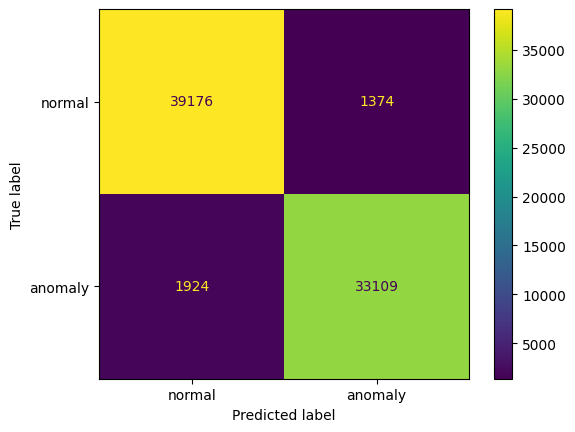

In [ ]:
cm = confusion_matrix(y_train3, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = Y3.unique()).plot()

In [ ]:
num_splits3 = 10
kf3 = StratifiedKFold(n_splits=num_splits3,random_state=42,shuffle=True)
scorings3 = {"acc" : "accuracy", "prec_macro" : "precision_macro", "rec_macro" : "recall_macro" }
scores3 = cross_validate(scaled_svm3, X3, Y3, scoring = scorings3, cv = kf3, return_train_score = True)

In [ ]:
print("=======================================================")
i = 0
for i in range(0,num_splits3):
  print("Accuracy rating for k={}: {}".format(i+1, scores3["test_acc"][i]))
  print("Precision rating for k={}: {}".format(i+1, scores3["test_prec_macro"][i]))
  print("Recall rating for k={}: {}".format(i+1, scores3["test_rec_macro"][i]))
  print("Training Accuracy rating for k = {}: {}".format(i + 1, scores3["train_acc"][i]))
  print("Training Precision rating for k = {}: {}".format(i + 1, scores3["train_prec_macro"][i]))
  print("Training Recall rating for k = {}: {}".format(i + 1, scores3["train_rec_macro"][i]))

  i += 1
  print("=======================================================")

print("Mean Test Accuracy: {}".format(average(scores3["test_acc"])))
print("Mean Test Precision: {}".format(average(scores3["test_prec_macro"])))
print("Mean Test Recall: {}".format(average(scores3["test_rec_macro"])))
print("\n\n")
print("Mean Training Accuracy: {}".format(average(scores3["train_acc"])))
print("Mean Training Precision: {}".format(average(scores3["train_prec_macro"])))
print("Mean Training Recall: {}".format(average(scores3["train_rec_macro"])))

Accuracy rating for k=1: 0.9626924908715669
Precision rating for k=1: 0.963354933908775
Recall rating for k=1: 0.9617731065718462
Training Accuracy rating for k = 1: 0.9605821389195149
Training Precision rating for k = 1: 0.9609961125393358
Training Recall rating for k = 1: 0.9598244968418672
Accuracy rating for k=2: 0.9618193364026036
Precision rating for k=2: 0.9621182430271968
Recall rating for k=2: 0.9611662659682649
Training Accuracy rating for k = 2: 0.9602205071664829
Training Precision rating for k = 2: 0.9606436317310137
Training Recall rating for k = 2: 0.9594519329352693
Accuracy rating for k=3: 0.9593586283537069
Precision rating for k=3: 0.9597425800210484
Recall rating for k=3: 0.9586109003893784
Training Accuracy rating for k = 3: 0.9599911797133407
Training Precision rating for k = 3: 0.9604815573475805
Training Recall rating for k = 3: 0.9591687903385466
Accuracy rating for k=4: 0.9588790981979837
Precision rating for k=4: 0.959703180611035
Recall rating for k=4: 0.957

In [ ]:
kitsune = pd.read_csv("mirai_combined.csv", header=0)
kitsune.head()

,FV-1,FV-2,FV-3,FV-4,FV-5,FV-6,FV-7,FV-8,FV-9,FV-10,...,FV-108,FV-109,FV-110,FV-111,FV-112,FV-113,FV-114,FV-115,FV-116,Verdict
0,34557,4.536177,81.246908,16.000883,6.124516,80.825036,24.468502,9.355203,80.356604,33.130469,...,0.0,0.0,57.153864,82.0,9.540000e-07,82.0,9.090000e-13,0.0,0.0,Benign
1,13877,6.179338,78.034448,71.516542,8.509252,77.095208,83.848440,16.588742,75.950353,96.494006,...,0.0,0.0,153.172206,82.0,9.540000e-07,82.0,9.090000e-13,0.0,0.0,Benign
2,146508,52.438050,60.109966,1.825981,86.192583,60.144857,5.367632,290.248238,60.262133,26.120001,...,0.0,0.0,12467.528810,60.0,6.330000e-06,60.0,4.000000e-11,0.0,0.0,Malicious
3,35214,1.396108,60.002367,0.052072,2.022297,60.135229,2.956742,6.074846,66.246425,98.403522,...,0.0,0.0,3.979329,60.0,1.170000e-06,60.0,1.360000e-12,0.0,0.0,Benign
4,149840,86.831679,60.013720,0.191795,122.992630,60.029334,0.407781,324.370703,60.064888,0.901121,...,0.0,0.0,14118.549000,60.0,5.390000e-06,60.0,2.910000e-11,0.0,0.0,Malicious


In [ ]:
X4 = kitsune[kitsune.columns[0:116]]
Y4 = kitsune['Verdict']
X4

,FV-1,FV-2,FV-3,FV-4,FV-5,FV-6,FV-7,FV-8,FV-9,FV-10,...,FV-107,FV-108,FV-109,FV-110,FV-111,FV-112,FV-113,FV-114,FV-115,FV-116
0,34557,4.536177,81.246908,16.000883,6.124516,80.825036,24.468502,9.355203,80.356604,33.130469,...,0.000000e+00,0.000000e+00,0.000000e+00,57.153864,82.0,9.540000e-07,82.000000,9.090000e-13,0.000000e+00,0.000000e+00
1,13877,6.179338,78.034448,71.516542,8.509252,77.095208,83.848440,16.588742,75.950353,96.494006,...,1.820000e-12,0.000000e+00,0.000000e+00,153.172206,82.0,9.540000e-07,82.000000,9.090000e-13,0.000000e+00,0.000000e+00
2,146508,52.438050,60.109966,1.825981,86.192583,60.144857,5.367632,290.248238,60.262133,26.120001,...,5.000000e-12,0.000000e+00,0.000000e+00,12467.528810,60.0,6.330000e-06,60.000000,4.000000e-11,0.000000e+00,0.000000e+00
3,35214,1.396108,60.002367,0.052072,2.022297,60.135229,2.956742,6.074846,66.246425,98.403522,...,4.550000e-13,0.000000e+00,0.000000e+00,3.979329,60.0,1.170000e-06,60.000000,1.360000e-12,0.000000e+00,0.000000e+00
4,149840,86.831679,60.013720,0.191795,122.992630,60.029334,0.407781,324.370703,60.064888,0.901121,...,2.000000e-11,0.000000e+00,0.000000e+00,14118.549000,60.0,5.390000e-06,60.000000,2.910000e-11,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,139232,1.038981,73.884682,1.601151,1.196166,73.311681,9.162677,2.540036,70.903429,33.763241,...,8.580000e-12,-1.520000e-27,-2.640000e-16,143.075032,74.0,1.350000e-06,104.651804,5.750000e-12,-6.910000e-28,-2.190000e-16
74996,126146,90.019578,60.090851,1.072030,124.173936,60.104502,1.270950,318.817251,60.109890,1.988073,...,7.730000e-12,0.000000e+00,0.000000e+00,2814.398898,60.0,3.930000e-06,60.000000,1.550000e-11,0.000000e+00,0.000000e+00
74997,135608,3.849634,82.443868,3.353926,6.456668,82.498111,3.736791,15.270160,82.473011,3.686363,...,9.090000e-13,0.000000e+00,0.000000e+00,55.842591,82.0,1.350000e-06,82.000000,1.820000e-12,0.000000e+00,0.000000e+00
74998,134464,89.625846,60.060003,0.841974,126.849144,60.075535,1.094176,330.466834,60.126468,2.554688,...,6.370000e-12,0.000000e+00,0.000000e+00,7928.536032,60.0,6.680000e-06,60.000000,4.460000e-11,0.000000e+00,0.000000e+00


In [ ]:
Y4

0           Benign
1           Benign
2        Malicious
3           Benign
4        Malicious
           ...    
74995    Malicious
74996    Malicious
74997    Malicious
74998    Malicious
74999    Malicious
Name: Verdict, Length: 75000, dtype: object

In [ ]:
scaler4 = StandardScaler()
svm4 = LinearSVC(C = .0000875, loss = "hinge", max_iter = 1000000, random_state = 42)
scaled_svm4 = Pipeline([("scaler", scaler4), ("linear_svc", svm4),])
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,Y4, test_size = 0.3, random_state = 42)

In [ ]:
scaled_svm4.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=8.75e-05, loss='hinge', max_iter=1000000,
                           random_state=42))])

In [55]:
predictions4 = scaled_svm4.predict(X_test4)
print("Test Accuracy: {}".format(accuracy_score(y_test4, predictions4)))
print("Test Precision: {}".format(precision_score(y_test4,predictions4, average = 'weighted')))
print("Test Recall: {}".format(recall_score(y_test4,predictions4, average = 'weighted')))

cr = classification_report(y_test4, predictions4);
print(cr);


Test Accuracy: 0.9991555555555556
Test Precision: 0.9991569725337809
Test Recall: 0.9991555555555556
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     11304
   Malicious       1.00      1.00      1.00     11196

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



In [59]:
predictions4 = scaled_svm4.predict(X_train4)
print("Training Accuracy: {}".format(accuracy_score(y_train4, predictions4)))
print("Training Precision: {}".format(precision_score(y_train4,predictions4, average = 'weighted')))
print("Training Recall: {}".format(recall_score(y_train4,predictions4, average = 'weighted')))

cr = classification_report(y_train4, predictions4, digits = 7);
print(cr);


Training Accuracy: 0.9992761904761904
Training Precision: 0.9992772389156929
Training Recall: 0.9992761904761904
              precision    recall  f1-score   support

      Benign  0.9985515 1.0000000 0.9992752     26196
   Malicious  1.0000000 0.9985554 0.9992772     26304

    accuracy                      0.9992762     52500
   macro avg  0.9992757 0.9992777 0.9992762     52500
weighted avg  0.9992772 0.9992762 0.9992762     52500



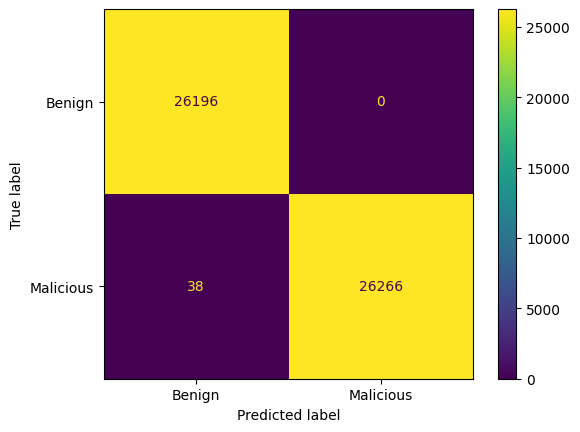

In [ ]:
cm = confusion_matrix(y_train4, predictions4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = Y4.unique()).plot()

In [ ]:
num_splits4 = 10
kf4 = StratifiedKFold(n_splits=num_splits4,random_state=42,shuffle=True)
scorings4 = {"acc" : "accuracy", "prec_macro" : "precision_macro", "rec_macro" : "recall_macro" }
scores4 = cross_validate(scaled_svm4, X4, Y4, scoring = scorings4, cv = kf4, return_train_score = True)

In [ ]:
print("=======================================================")
i = 0
for i in range(0,num_splits4):
  print("Accuracy rating for k={}: {}".format(i+1, scores4["test_acc"][i]))
  print("Precision rating for k={}: {}".format(i+1, scores4["test_prec_macro"][i]))
  print("Recall rating for k={}: {}".format(i+1, scores4["test_rec_macro"][i]))
  print("Training Accuracy rating for k = {}: {}".format(i + 1, scores4["train_acc"][i]))
  print("Training Precision rating for k = {}: {}".format(i + 1, scores4["train_prec_macro"][i]))
  print("Training Recall rating for k = {}: {}".format(i + 1, scores4["train_rec_macro"][i]))

  i += 1
  print("=======================================================")

print("Mean Test Accuracy: {}".format(average(scores4["test_acc"])))
print("Mean Test Precision: {}".format(average(scores4["test_prec_macro"])))
print("Mean Test Recall: {}".format(average(scores4["test_rec_macro"])))
print("\n\n")
print("Mean Training Accuracy: {}".format(average(scores4["train_acc"])))
print("Mean Training Precision: {}".format(average(scores4["train_prec_macro"])))
print("Mean Training Recall: {}".format(average(scores4["train_rec_macro"])))

Accuracy rating for k=1: 1.0
Precision rating for k=1: 1.0
Recall rating for k=1: 1.0
Training Accuracy rating for k = 1: 0.9998962962962963
Training Precision rating for k = 1: 0.9998963178007525
Training Recall rating for k = 1: 0.9998962962962963
Accuracy rating for k=2: 1.0
Precision rating for k=2: 1.0
Recall rating for k=2: 1.0
Training Accuracy rating for k = 2: 0.9999407407407407
Training Precision rating for k = 2: 0.999940747763228
Training Recall rating for k = 2: 0.9999407407407408
Accuracy rating for k=3: 1.0
Precision rating for k=3: 1.0
Recall rating for k=3: 1.0
Training Accuracy rating for k = 3: 1.0
Training Precision rating for k = 3: 1.0
Training Recall rating for k = 3: 1.0
Accuracy rating for k=4: 0.9997333333333334
Precision rating for k=4: 0.9997334754797441
Recall rating for k=4: 0.9997333333333334
Training Accuracy rating for k = 4: 0.9999111111111111
Training Precision rating for k = 4: 0.9999111269107714
Training Recall rating for k = 4: 0.9999111111111111
A